[View in Colaboratory](https://colab.research.google.com/github/kookoowaa/Projects/blob/master/Churn_with_Online_gameEDA_cwp.ipynb)

In [4]:
#### configuring inline figure size

%pylab  inline
pylab.rcParams ['figure.figsize'] = (24, 10)

Populating the interactive namespace from numpy and matplotlib


In [0]:
#### import dataset from the google drive

!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials 
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
!pip install --upgrade seaborn
!pip install --upgrade pandas
!pip install --upgrade matplotlib
#### upgrade 후 runtime 초기화

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.23.4)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (2.2.3)


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
the_order = ['week', 'month', '2month', 'retained']

In [8]:
file_id = '1UKQ6pt47ogMjOi3bsyIuFWf5Bw8Epont'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('label')
label = pd.read_csv('label')
label.head()

,acc_id,label
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week


In [9]:
file_id = '1bsa0jiYWjdLkVV5-ax4h5Hhu9Ev6znhU'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('activity')
activity = pd.read_csv('activity')
activity.head()

,wk,acc_id,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,game_combat_time,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,7,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,4,2.088814,4.405057,-0.245477,4.454059,3.009797,-0.306354,1.184011,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.466939,-0.027758,-0.365536
1,8,3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...,5,2.673460,4.760178,-0.222527,6.107479,4.758528,-0.306354,1.709534,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,5.070359,-0.027758,-0.365536
2,3,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.649522,-0.231021,-0.290803,-0.245978,-0.487666,-0.306354,-0.566706,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.498275,-0.027758,-0.365536
3,4,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,2,-0.658235,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
4,5,b8856358ff62e596fa07e3e40b8e7fd4b7729263c72b44...,4,-0.654734,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,-0.569842,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536


In [10]:
rd = pd.merge(label, activity)
rd.head()

,acc_id,label,wk,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,8,3,1.519815,2.910685,-0.268110,2.852241,2.332910,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,2.161452,-0.027758,-0.365536
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,5,7,4.698532,9.147854,-0.138458,8.584935,5.995250,-0.306354,...,-0.03313,0.319626,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,3.066084,-0.027758,-0.365536
2,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,6,3,0.632257,0.213292,-0.290501,-0.022940,0.169815,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.167841,-0.027758,-0.365536
3,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,7,6,1.218180,1.787315,-0.159228,1.727487,1.403784,-0.198324,...,-0.03313,0.054378,-0.096277,-0.016574,-0.275174,-0.343293,-0.024028,0.937219,-0.027758,-0.365536
4,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,8,7,0.521166,-0.231874,-0.030257,-0.250423,-0.208689,-0.015505,...,-0.03313,-0.034038,0.187146,-0.016574,-0.275174,-0.343293,-0.024028,1.224318,-0.027758,-0.365536


In [11]:
rd8 = rd[rd['wk']==8]
rd8.head()

,acc_id,label,wk,cnt_dt,play_time,npc_exp,npc_hongmun,quest_exp,quest_hongmun,item_hongmun,...,cnt_clear_bam,normal_chat,whisper_chat,district_chat,party_chat,guild_chat,faction_chat,cnt_use_buffitem,gathering_cnt,making_cnt
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,8,3,1.519815,2.910685,-0.268110,2.852241,2.332910,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,2.161452,-0.027758,-0.365536
4,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,8,7,0.521166,-0.231874,-0.030257,-0.250423,-0.208689,-0.015505,...,-0.03313,-0.034038,0.187146,-0.016574,-0.275174,-0.343293,-0.024028,1.224318,-0.027758,-0.365536
5,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,8,3,1.110035,2.916233,-0.278291,2.431554,1.261065,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,1.841851,-0.027758,-0.365536
6,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,8,1,-0.659214,-0.231874,-0.290803,-0.250423,-0.487666,-0.306354,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.275174,-0.343293,-0.024028,-0.503692,-0.027758,-0.365536
9,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,8,2,-0.175769,-0.231874,0.025157,-0.250423,-0.464898,-0.144310,...,-0.03313,-0.034038,-0.231827,-0.016574,-0.227647,-0.343293,-0.024028,-0.032417,-0.027758,0.360166


In [12]:
rd.shape

(440323, 39)

In [13]:
#rd['label'] = rd['label'].astype('category')
rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440323 entries, 0 to 440322
Data columns (total 39 columns):
acc_id                      440323 non-null object
label                       440323 non-null object
wk                          440323 non-null int64
cnt_dt                      440323 non-null int64
play_time                   440323 non-null float64
npc_exp                     440323 non-null float64
npc_hongmun                 440323 non-null float64
quest_exp                   440323 non-null float64
quest_hongmun               440323 non-null float64
item_hongmun                440323 non-null float64
game_combat_time            440323 non-null float64
get_money                   440323 non-null float64
duel_cnt                    440323 non-null float64
duel_win                    440323 non-null float64
partybattle_cnt             440323 non-null float64
partybattle_win             440323 non-null float64
cnt_enter_inzone_solo       440323 non-null float64
cnt_enter_i

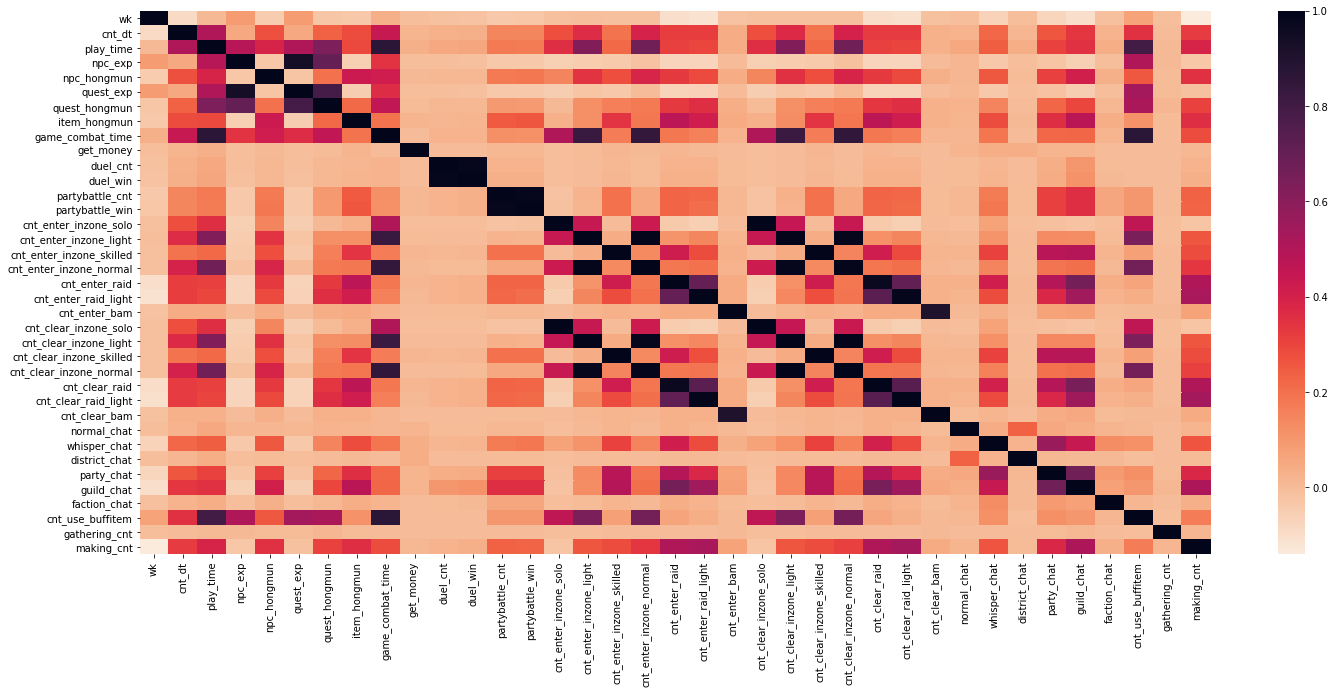

In [14]:
rd_corr = rd.corr()
sns.heatmap(rd_corr, cmap = 'rocket_r')

### - cnt_enter_raid, cnt_enter_raid_light, cnt_clear_raid 간에는 높은 상관관계
### - duel_cnt와 duel_win은 거의 같은 지표라 해도 무방할 정도
### - guild_chat과 party_chat 간의 높은 상관관계
### - quest_hongmun과 quest_exp 간에는 높은 상관관계

In [15]:
rd.iloc[:, 12:14].corr()

,duel_cnt,duel_win
duel_cnt,1.000000,0.985314
duel_win,0.985314,1.000000


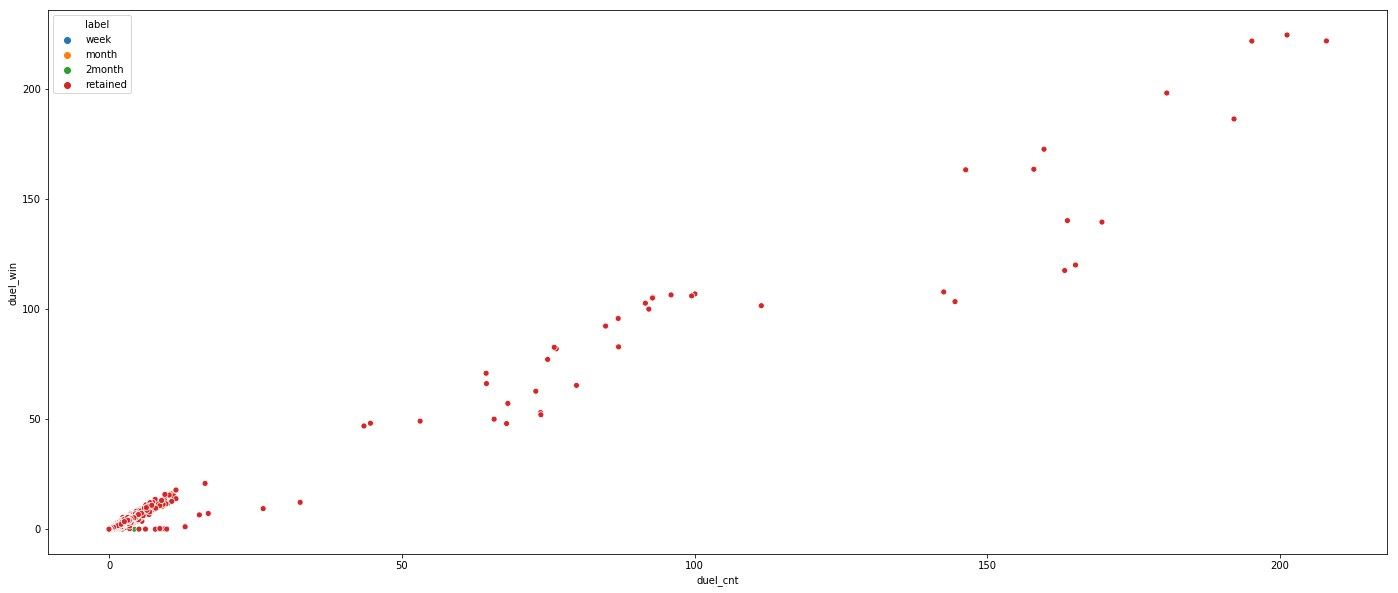

In [16]:
sns.scatterplot(x = 'duel_cnt', y = 'duel_win', hue = 'label', data = rd, hue_order=the_order, markers = 'label')

In [17]:
rd.loc[:, ['cnt_enter_raid', 'cnt_enter_raid_light', 'cnt_clear_raid']].corr()

,cnt_enter_raid,cnt_enter_raid_light,cnt_clear_raid
cnt_enter_raid,1.000000,0.704731,0.966273
cnt_enter_raid_light,0.704731,1.000000,0.730706
cnt_clear_raid,0.966273,0.730706,1.000000


### - Enter와 Clear와 높은 상관관계
### - Clear/Enter (성공률) 비교하는 것이 의미 있을지도
### - 하드한 게이머 + retained 유저일수록 성공률이 높을 것 (가정)

In [18]:
clear_rate = pd.concat([rd['label'], rd['cnt_clear_raid']/rd['cnt_enter_raid']], axis = 1)
clear_rate.columns = ['label', 'cl_rate']
clear_rate.head()

,label,cl_rate
0,week,0.998605
1,week,0.998605
2,week,0.998605
3,week,0.998605
4,week,0.998605


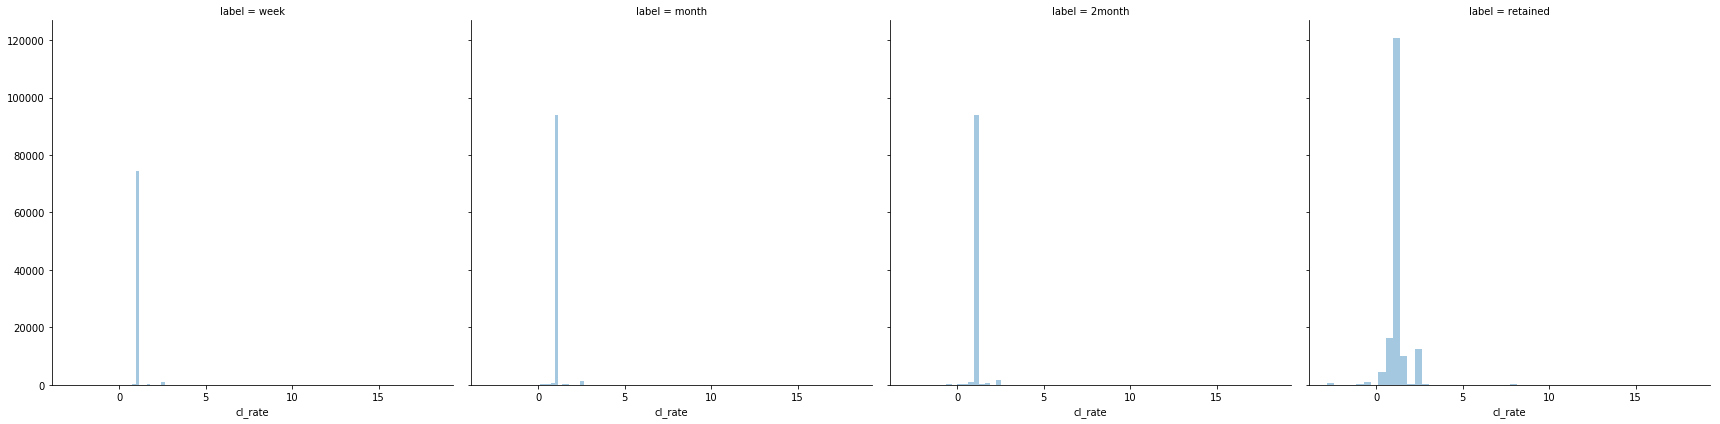

In [19]:
clear_facet = sns.FacetGrid(data = clear_rate, col = 'label', height = 6, col_order=the_order)
clear_facet.map(sns.distplot, 'cl_rate', kde=False)

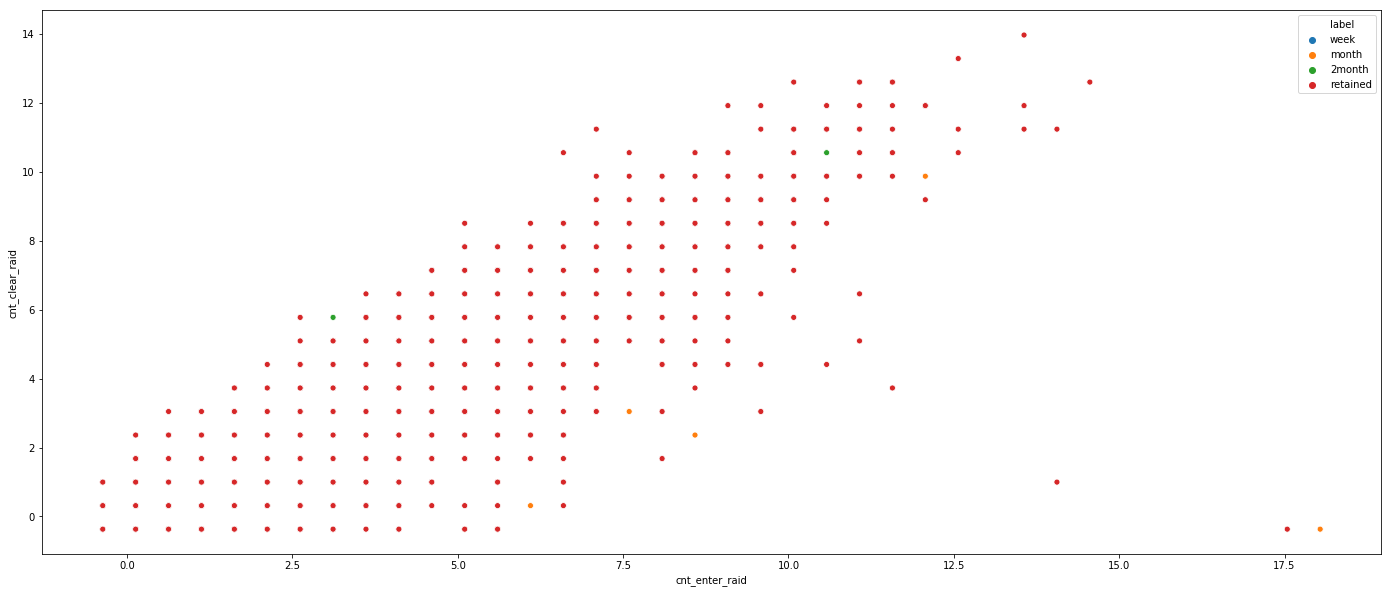

In [20]:
sns.scatterplot(x = 'cnt_enter_raid', y = 'cnt_clear_raid', data = rd, hue = 'label', hue_order = the_order)

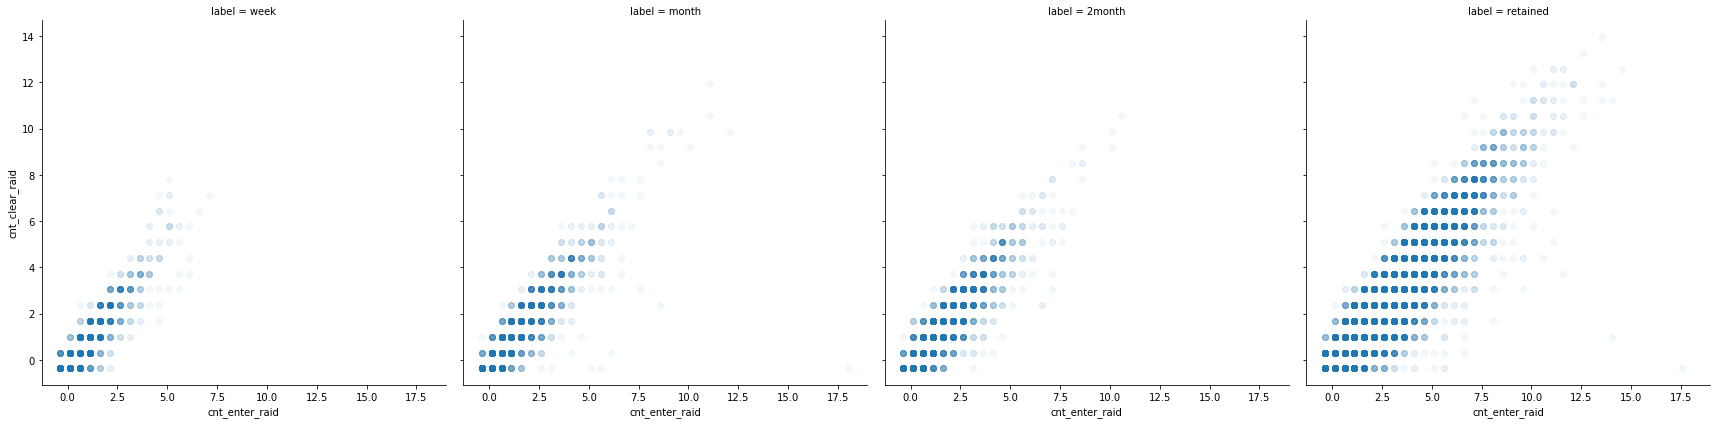

In [21]:
sns.FacetGrid(data = rd, col = 'label', height=6, col_order =the_order).map(plt.plot, 'cnt_enter_raid', 'cnt_clear_raid', linestyle = '', marker = 'o', alpha = 0.05)

>- 당연히 retained user보다 week로 갈수록 레이드 참여빈도 및 성공빈도가 줄어듬 (특별할 것 없음)
>- 성공률 (파생변수)은 큰 차이를 보이지는 않지만, 분포가 더 넓은 것을 볼 수 있음
>- 데이터를 들여다 보니 retained 그룹 중에 성공률이 매우 낮은 그룹이 있는 것을 확인
>- 역으로 추정하건데, **성공률이 매우 낮은 그룹은 hardcore gamer로 난이도 높은 던전을 반복 트라이하면서 오히려 retained 된게 아닌가 싶음**
>- *극단적 hardcore gamer 그룹* 추정 가능

<br>
###  유사한 방식으로 duel_cnt, duel_win 간에도 비슷한 성질이 있을 것으로 추정

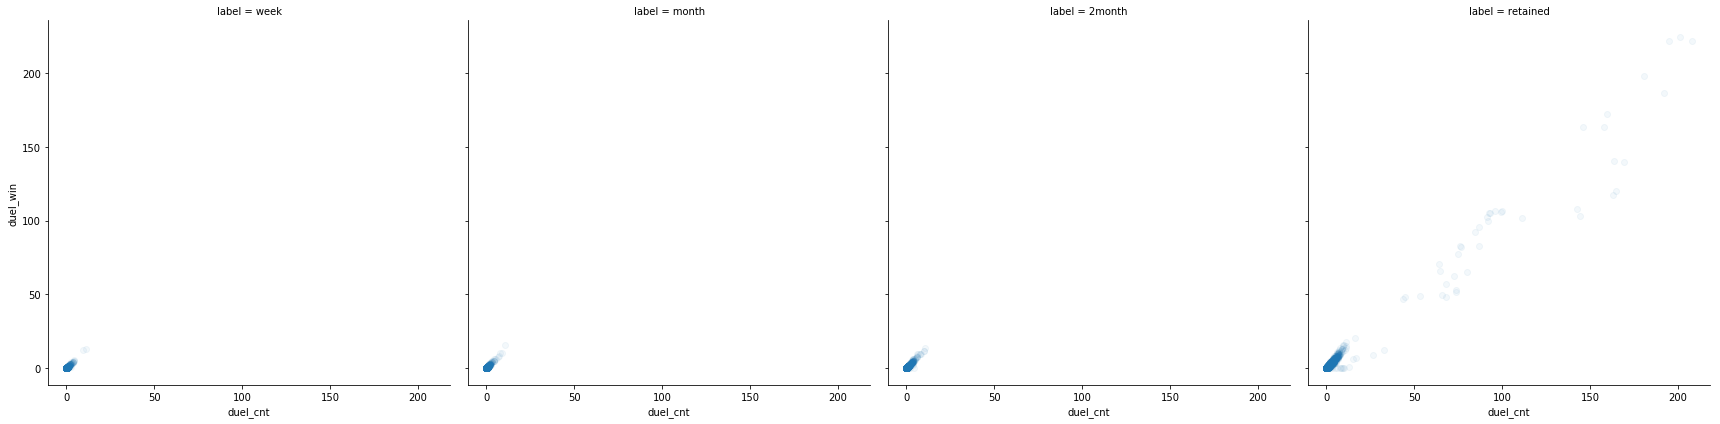

In [31]:
sns.FacetGrid(data = rd, col = 'label',height=6, col_order = the_order).map(plt.plot, 'duel_cnt', 'duel_win', linestyle = '', marker = 'o', alpha = 0.05)

- duel_cnt, duel_win 사이에는 딱히 그런 패턴이 눈에 들어나지 않음
- 아마 1) pve와는 다르게 pvp는 승자그룹과 패자그룹이 동시에 존재하고, 2) 해당 지표가 표준화 되어서 튀는 패턴이 없는 것으로 추정

### - guild_chat: 길드에서 수다 떠는 사람만 떠는 전형적인 모습

In [23]:
rd['guild_chat'].describe()

count    440323.000000
mean         -0.002359
std           0.997496
min          -0.343293
25%          -0.343293
50%          -0.343293
75%          -0.343293
max          26.279808
Name: guild_chat, dtype: float64

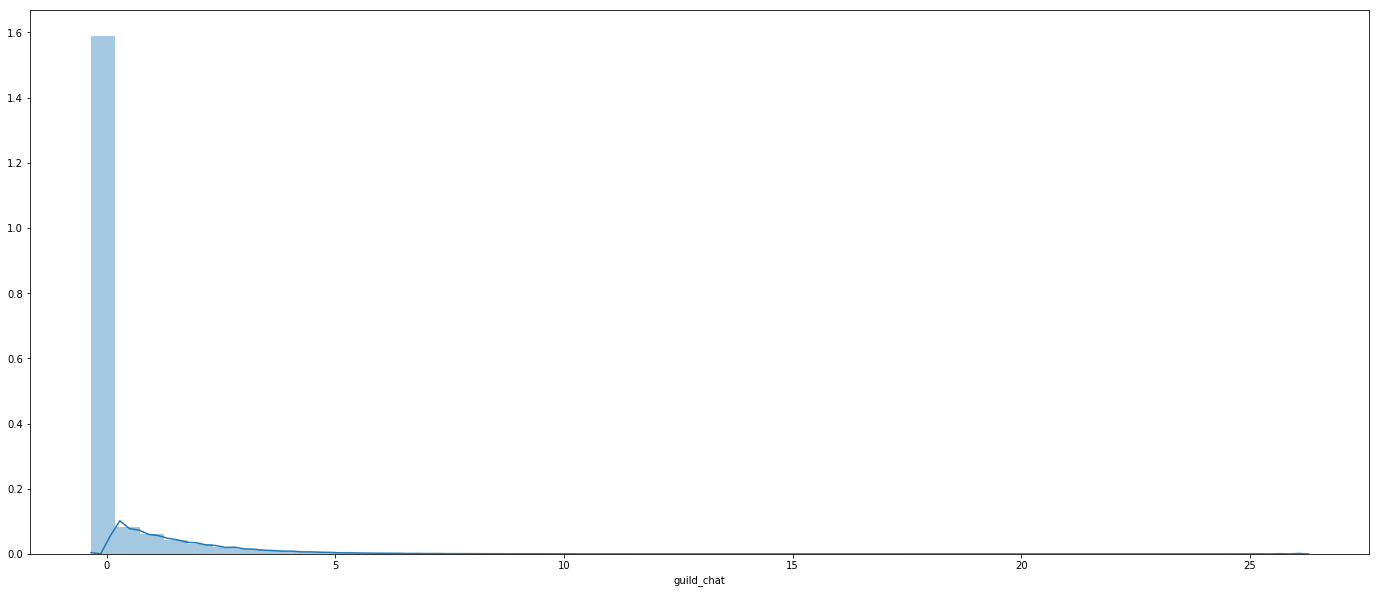

In [24]:
sns.distplot(rd['guild_chat'])

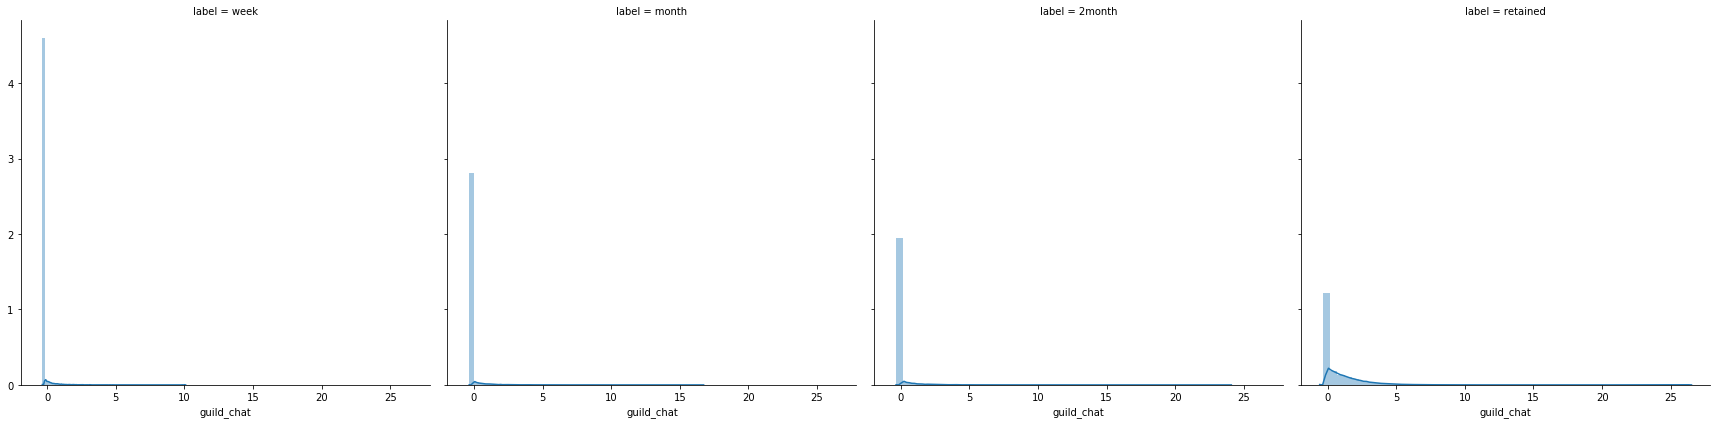

In [25]:
sns.FacetGrid(data = rd, col='label', height = 6, col_order=the_order).map(sns.distplot, 'guild_chat')

- 마찬가지로 retained 그룹에서 길드 활동이 더 적극적인 행태를 띔

## 호기심1. 채팅 빈도에 따른 label은 어떻게 다를까?

In [26]:
rd.loc[:, ['normal_chat', 'district_chat', 'whisper_chat', 'party_chat', 'guild_chat', 'faction_chat']].corr()

,normal_chat,district_chat,whisper_chat,party_chat,guild_chat,faction_chat
normal_chat,1.000000,0.236860,0.044550,0.053610,0.039376,0.020556
district_chat,0.236860,1.000000,0.027333,0.012878,0.009931,0.007234
whisper_chat,0.044550,0.027333,1.000000,0.559682,0.441185,0.128009
party_chat,0.053610,0.012878,0.559682,1.000000,0.669490,0.094341
guild_chat,0.039376,0.009931,0.441185,0.669490,1.000000,0.076381
faction_chat,0.020556,0.007234,0.128009,0.094341,0.076381,1.000000


In [27]:
rd['chat'] = rd['normal_chat'] +rd['district_chat'] + rd['whisper_chat'] + rd['party_chat'] + rd['guild_chat'] + rd['faction_chat']
rd8['chat'] = rd8['normal_chat'] +rd8['district_chat'] + rd8['whisper_chat'] + rd8['party_chat'] + rd8['guild_chat'] + rd8['faction_chat']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


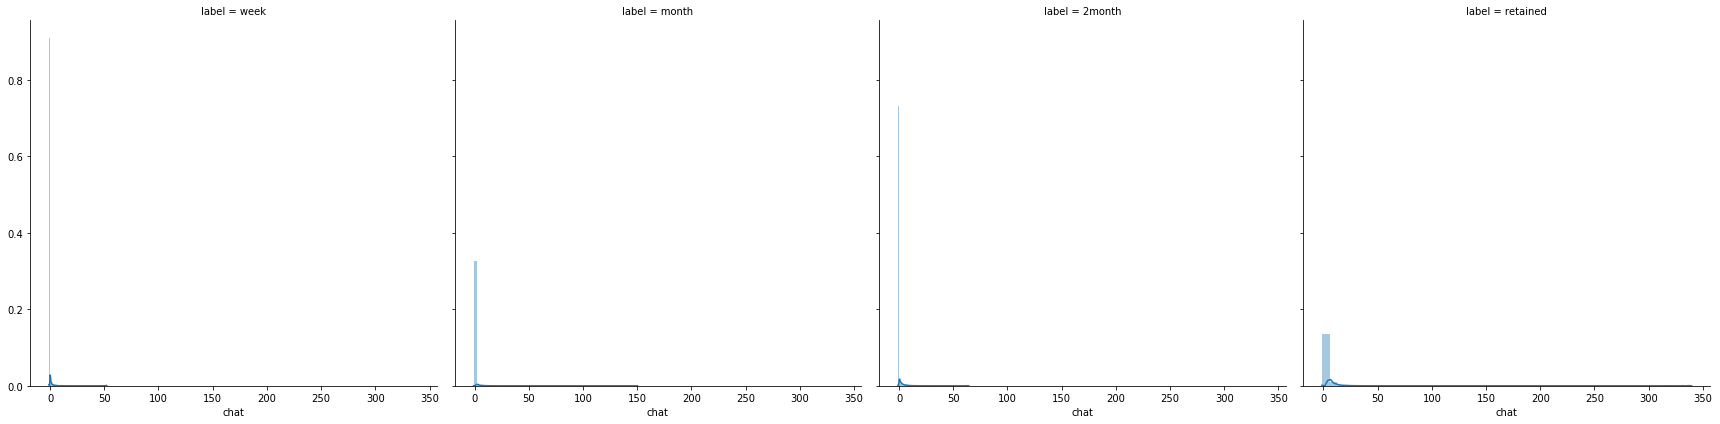

In [28]:
sns.FacetGrid(data = rd, col = 'label', height = 6).map(sns.distplot, 'chat')

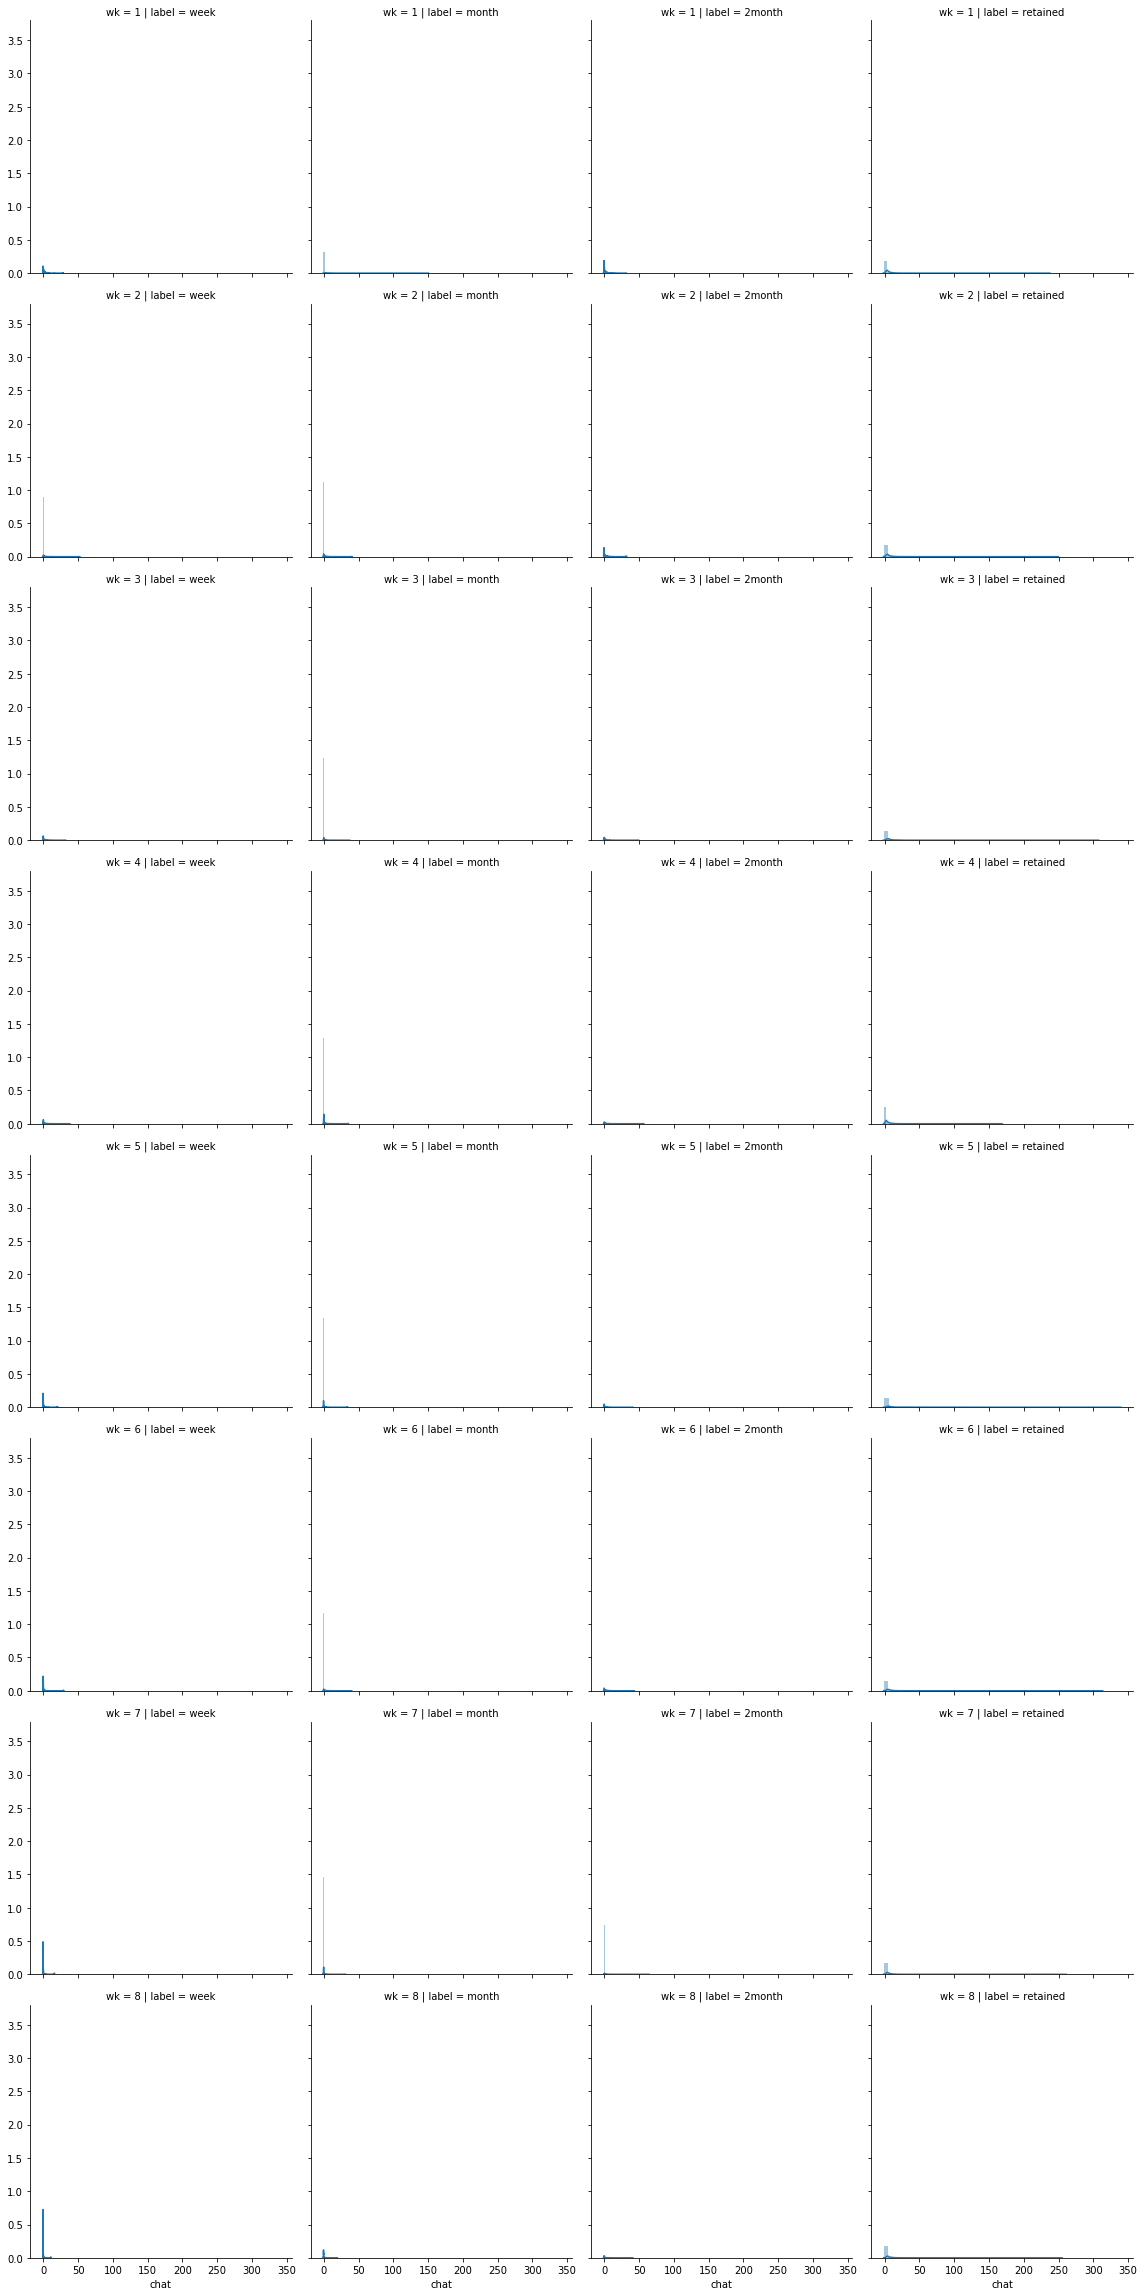

In [29]:
sns.FacetGrid(data = rd, col = 'label', row = 'wk', height = 4).map(sns.distplot, 'chat')

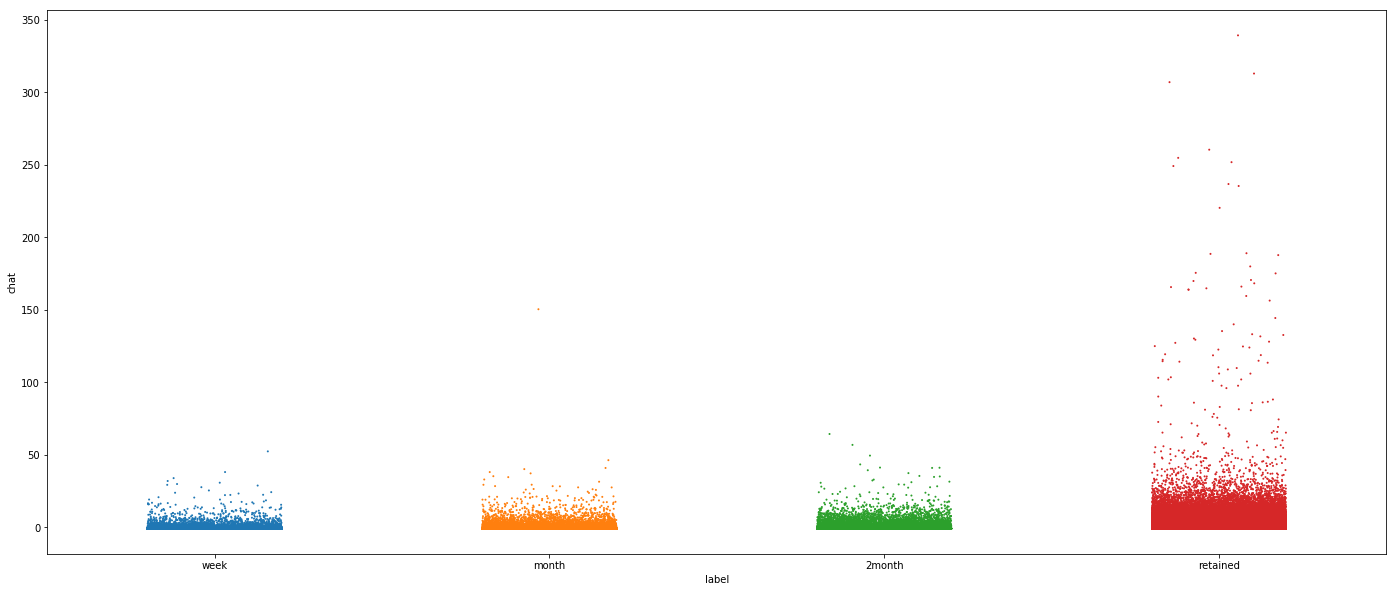

In [30]:
sns.stripplot(x = 'label', y = 'chat', data = rd, jitter = 0.2, size =2)

- 눈에 띄는 현상은 포착하지 못함